Pada kesempatan kali ini kita akan melakukan pengolahan data covid-19 di Indonesia. Data ini diambil dari situs kawalcovid19.
Data diambil sebagian dari tanggal 1 Juli 2021 - 14 November 2021.

Pada kesempatan kali ini kita akan coba melakukan forecasting dengan menerapkan metode data science yang sudah kita pelajari sebelumnya

1. Business Understanding / Question

Pada kesempatan kali ini kita ingin mengetahui bagaimana perkembangan kasus baru pada tanggal 15 Nov 2021 - 14 Des 2021 di Indonesia. Jika diasumsikan tidak adanya outbreak mendadak dan masuknya varian baru apakah kasusnya bisa menurun dan sejauh apa menurunnya. 

2. Data Collection 

Disini kita akan mencoba untuk mengumpulkan data yang kita butuhkan. Beruntungnya, kita sudah memiliki datanya dan hanya tinggal melakukan pemanggilan.

In [ ]:
#import semua package/library pada sel ini, jika butuh memasukkan package/library baru maka run ulang sel ini
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as lr
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
#panggil dalam bentuk dataframe pada langkah kali ini, dan tampilkan dengan metode head
df = pd.read_csv('covid_indonesia_2.csv')
df.head

<bound method NDFrame.head of         Tanggal  Kasus_harian  Total_kasus  Kasus_aktif  Sembuh_baru   Sembuh  \
0    2021-07-01         24836      2203108       253826         9874  1890287   
1    2021-07-02         25830      2228938       267539        11578  1901865   
2    2021-07-03         27913      2256851       281677        13282  1915147   
3    2021-07-04         27233      2284084       295228        13127  1928274   
4    2021-07-05         29745      2313829       309999        14416  1942690   
..          ...           ...          ...          ...          ...      ...   
132  2021-11-10           480      4249323         9537          531  4096194   
133  2021-11-11           435      4249758         9486          470  4096664   
134  2021-11-12           399      4250157         9305          560  4097224   
135  2021-11-13           359      4250516         9198          451  4097675   
136  2021-11-14           339      4250855         9018          503  4098178  

2. Data Preparation

Pada langkah ini kita akan menyiapkan data yang kita butuhkan. kita akan menggunakan dua kolom pada kesempatan kali ini yaitu total kasus dan tanggal. pertama kita lihat dulu detail dari dataset kita.

In [ ]:
#tuliskan kode disini
df.describe()

,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia
count,137.000000,1.370000e+02,137.000000,137.000000,1.370000e+02,137.000000,137.00000
mean,15128.343066,3.800636e+06,212836.240876,16188.065693,3.467221e+06,621.664234,120578.20438
std,16758.477055,6.121355e+05,201927.468029,15064.380154,7.427454e+05,614.988956,28539.47019
min,244.000000,2.203108e+06,9018.000000,451.000000,1.890287e+06,11.000000,58995.00000
25%,1053.000000,3.532567e+06,22541.000000,1946.000000,2.907920e+06,50.000000,100636.00000
50%,5436.000000,4.140634e+06,138630.000000,12474.000000,3.864848e+06,493.000000,137156.00000
75%,29745.000000,4.228552e+06,380797.000000,29794.000000,4.063295e+06,1128.000000,142716.00000
max,56757.000000,4.250855e+06,574135.000000,48832.000000,4.098178e+06,2069.000000,143659.00000


lalu kita lihat tipe data dari semua kolom pada dataset

In [ ]:
#tuliskan kode disini
df.dtypes

Tanggal            object
Kasus_harian        int64
Total_kasus         int64
Kasus_aktif         int64
Sembuh_baru         int64
Sembuh              int64
Meninggal_baru      int64
Meninggal_Dunia     int64
dtype: object

Karena yang akan kita gunakan adalah kolom tanggal sebagai time-series dan kasus harian sebagai input kita. maka kita perhatikan dua kolom tersebut.
Pada detail kasus harian terlihat nilai max dan min yang sangat jauh dengan 50% data berada di angka 5000 an. jauh dari rata-rata di 15000 an. sehingga kita perlu melakukan normalisasi pada kolom tersebut. Lalu karena mesin kita bekerja dengan numerik, maka kita akan ubah tanggal kita jadi numerik.

In [ ]:
'''pada kolom ini kita akan melakukan transformasi dan menambahkan kolom baru pada dataframe kita. 
Kita beri nama kolom baru dengan data hasil normalisasi tersebut sebagai cases_norm.
Pada bagian ini saya akan menggunakan metode logaritmik, dipersilahkan jika peserta ingin menggunakan metode yang lain
'''

scaler = StandardScaler()
df2 = df.copy()

cases_norm = pd.DataFrame({'cases_norm' : df2['Kasus_harian'].transform(lambda x: np.log(x)) })

df2['cases_norm'] = cases_norm
display(df2)

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia,cases_norm
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995,10.120049
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534,10.159292
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027,10.236848
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582,10.212185
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140,10.300416
...,...,...,...,...,...,...,...,...,...
132,2021-11-10,480,4249323,9537,531,4096194,14,143592,6.173786
133,2021-11-11,435,4249758,9486,470,4096664,16,143608,6.075346
134,2021-11-12,399,4250157,9305,560,4097224,20,143628,5.988961
135,2021-11-13,359,4250516,9198,451,4097675,15,143643,5.883322


Setelah ini kita akan mengubah kolom tanggal menjadi kolom numerik dengan 1 Juli 2021 sebagai dasar. 
Artinya saya akan mengubah 

2021-07-01 menjadi 0, 

2021-07-02 menjadi 1,

dst.

In [ ]:
'''Dengan memanfaatkan metode to_datetime pada pandas silahkan ubah row index 0 pada tanggal dan masukkan pada suatu variabel bernama default_date.
Nilai inilah yang akan menjadi nilai pengurang untuk tanggal lainnya
'''
default_date = pd.to_datetime(df2['Tanggal'][0])
print(f'nilai default_date adalah : {default_date}')

nilai default_date adalah : 2021-07-01 00:00:00


Sekarang kita akan membuat fungsi yang akan mengubah semua tanggal pada kolom menjadi numerik dengan basis pada tanggal 1 Juli 2021.

In [ ]:
'''Pada kesempatan kali ini kita akan memanfaatkan apply() dan lambda().
Kita akan masukkan pada sebuah kolom baru bernama days. lalu kita tampilkan dataframe terbaru
Hint
...['days'] = ....apply(lambda x: pd.Timedelta(pd.to_datetime(x) - ...).days)

'''

df2['days'] = df2['Tanggal'].apply(lambda x: pd.Timedelta(pd.to_datetime(x) - pd.to_datetime(default_date)).days)
df2

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia,cases_norm,days
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995,10.120049,0
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534,10.159292,1
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027,10.236848,2
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582,10.212185,3
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140,10.300416,4
...,...,...,...,...,...,...,...,...,...,...
132,2021-11-10,480,4249323,9537,531,4096194,14,143592,6.173786,132
133,2021-11-11,435,4249758,9486,470,4096664,16,143608,6.075346,133
134,2021-11-12,399,4250157,9305,560,4097224,20,143628,5.988961,134
135,2021-11-13,359,4250516,9198,451,4097675,15,143643,5.883322,135


Langkah terakhir,
Kita akan membuat copy dari data yang kolom cases_norm dan days ke dalam dataframe baru.

In [ ]:
#isikan pada sel ini dataframe terbaru dan tampilkan

df3 = df2[['cases_norm','days']]
df3

,cases_norm,days
0,10.120049,0
1,10.159292,1
2,10.236848,2
3,10.212185,3
4,10.300416,4
...,...,...
132,6.173786,132
133,6.075346,133
134,5.988961,134
135,5.883322,135


4. Data Processing

Sekarang kita akan memproses data kita. Terdapat dua bagian, pertama adalah pembuatan model dan kedua adalah evaluasi sederhana.

In [ ]:
#pembuatan model
'''import/tambahkan semua package/library pada sel paling atas(terkait library)
pada bagian kali ini kita akan mengubah days -- sumbu x dan cases_norm  -- sumbu y.
masukkan kedua kolom tersebut pada variabel yang bersesuaian. ubah menjadi bentuk numpy array dengan np.array()
Hint: gunakan .reshape((-1, 1)) pada sumbu x saat mengubah menjadi np.array agar mengubah dimensi array tersebut.
kita bagi menjadi data training dan test dengan test_size = 0.2
'''

days = np.array(df3['days']).reshape((-1,1))
cases_norm = np.array(df3['cases_norm']).reshape(-1,1)

X_train, X_test, y_train, y_test = tts(days, cases_norm, random_state=21, test_size=0.2)

print(f'dimensi dari X_train : {len(X_train)}')
print(f'dimensi dari y_train : {len(y_train)}')
print(f'dimensi dari X_test : {len(X_test)}')
print(f'dimensi dari y_test : {len(y_test)}')

dimensi dari X_train : 109
dimensi dari y_train : 109
dimensi dari X_test : 28
dimensi dari y_test : 28


Sekarang kita akan membuat model kita. Kita akan menggunakan polynomial regression. perbedaannya dengan linear regression hanya pada bagian sebelum di set ke model linear regression kita akan ubah dulu dalam bentuk polynomial.

In [ ]:
'''Import modul PolynomialFeatures dari sklearn.preprocessing dan taruh di sel package/library
panggil modul linear regression pada sklearn dan tempatkan di sel package/library
'''

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

#setelah ini, di bawah, buatlah model linear regression pada seperti biasa.
#gunakan X_poly untuk menggantikan X_train pada sesi training model linear regression pasangkan dengan y_train

model_l = lr()
model_l.fit(X_poly, y_train)

LinearRegression()

Selanjutkan kita akan melakukan evaluasi model kita dengan membuat prediksi dari x_test kita lalu bandingkan hasilnya dengan y_test. cari nilai r_square.

In [ ]:
#pertama mari kita prediksi kan seluruh data x_test.
'''kita akan gunakan poly_reg.fit_transform untuk mengubah data kita menjadi bentuk polynomialnya
'''

poly_x_test = poly_reg.fit_transform(X_test)

#setelah itu  buat variabel y_pred dengan menggunakan metode predict dan tampilkan y_pred
y_pred = model_l.predict(poly_x_test)
y_pred

array([[10.77728979],
       [10.32775004],
       [ 9.78657584],
       [ 9.91980041],
       [ 9.85364116],
       [ 6.7185994 ],
       [ 8.79251233],
       [ 7.16208018],
       [ 7.9051869 ],
       [ 8.03806365],
       [10.44557141],
       [ 7.86044161],
       [ 6.96724279],
       [ 7.49432468],
       [ 7.63331741],
       [ 8.98905664],
       [ 9.36515643],
       [ 6.56669516],
       [10.23700559],
       [ 7.72484664],
       [ 9.88683404],
       [ 9.25470493],
       [ 6.51560737],
       [10.38711376],
       [ 7.06511452],
       [10.61550792],
       [ 9.64972699],
       [10.67034128]])

In [ ]:
'''Evaluasi model kita dengan fungsi di bawah ini
import metrics dari sklearn dan taruh di sel atas
'''
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
R2 score is 0.9475514248281729


0.95 adalah angka yang baik. Sekarang kita lanjut untuk membuat prediksi data kita.
Ingat, di awal kita ingin memprediksi data kita 30 hari semenjak data terakhir.
buat numpy array dari 137 - 166

In [ ]:
#buat variabel numpy array yang diminta dan tampilkan. beri nama variabelnya predict_date

predict_date = np.arange(137,167).reshape((-1,1))
predict_date

array([[137],
       [138],
       [139],
       [140],
       [141],
       [142],
       [143],
       [144],
       [145],
       [146],
       [147],
       [148],
       [149],
       [150],
       [151],
       [152],
       [153],
       [154],
       [155],
       [156],
       [157],
       [158],
       [159],
       [160],
       [161],
       [162],
       [163],
       [164],
       [165],
       [166]])

In [ ]:
#lakukan prediksi dengan berbasis pada predict_date. manfaatkan kembali poly_reg.fit_transform dan pol_reg.predict.
#beri nama variabelnya predict_cases dan tampilkan

predict_date_x = poly_reg.fit_transform(predict_date)

predict_cases = np.exp(model_l.predict(predict_date_x))
predict_cases

array([[231.89460578],
       [219.29948945],
       [207.34149203],
       [195.9911417 ],
       [185.22017525],
       [175.00149686],
       [165.30913774],
       [156.11821692],
       [147.40490283],
       [139.146376  ],
       [131.32079264],
       [123.90724923],
       [116.88574801],
       [110.23716349],
       [103.94320981],
       [ 97.98640913],
       [ 92.35006081],
       [ 87.01821163],
       [ 81.97562679],
       [ 77.20776185],
       [ 72.70073552],
       [ 68.44130328],
       [ 64.41683188],
       [ 60.61527463],
       [ 57.02514749],
       [ 53.63550596],
       [ 50.43592278],
       [ 47.41646628],
       [ 44.56767961],
       [ 41.88056061]])

5. Data Analysis
Pada kesempatan kali ini kita akan melakukan analysis. Pertama dengan membuat grafik 30 hari kedepan. lalu menganalisis grafik dan model kita.

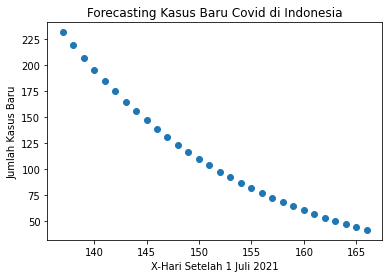

In [ ]:
#@title Teks judul default
#Disini kita akan melakukan plot grafik predict_date = x dan predict case = y
#Jangan lupa import matplotlib pada sel library/package

plt.scatter(predict_date, predict_cases)
plt.xlabel("X-Hari Setelah 1 Juli 2021")
plt.ylabel("Jumlah Kasus Baru")
plt.title("Forecasting Kasus Baru Covid di Indonesia")
plt.show()

In [ ]:
'''
Berikan Analisis kalian disini.
1. tentang grafik prediksi
Dari grafik tersebut, didapatkan prediksi setelah tanggal 1 Juli 2021 bahwa jumlah kasus baru Covid di Indonesia akan menurun.


2. tentang pemilihan polynomial regression dan model secara umum
Berbeda dengan linear regression, polynomial regression dapat memprediksi data dengan lebih detail / fit, dengan membentuk derajat kelengkungan.
R2 score yang didapat dengan menggunakan model ini adalah 0.94, dimana nilai tersebut menunjukkan bahwa model ini cocok untuk data covid yang
dianalisis dengan tingkat kesalahan yang rendah, sehingga mampu memprediksi dengan lebih akurat.






'''

'\nBerikan Analisis kalian disini.\n1. tentang grafik prediksi\n2. tentang pemilihan polynomial regression dan model secara umum\n\n\n\n\n\n\n\n'